# Network Traffic Analysis 

### 1. Initialization and Cleansing

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import requests
import plotly.graph_objects as go
# import plotly.io as pio
from bs4 import BeautifulSoup
# pio.renderers.default = "svg"

Data Sample

In [2]:
df=pd.read_csv('Sample.csv',index_col=None)
df.tail()

,No.,Time,Source,Destination,Protocol,Length,Info
31397,31398,125.558630,157.240.16.53,10.87.1.105,TCP,109,"[TCP Retransmission] 80 > 62494 [FIN, PSH, A..."
31398,31399,125.812197,10.87.1.105,239.255.255.250,SSDP,217,M-SEARCH * HTTP/1.1
31399,31400,125.827494,10.87.1.105,239.255.255.250,SSDP,217,M-SEARCH * HTTP/1.1
31400,31401,125.966420,Routerbo_eb:74:e4,Broadcast,ARP,60,Who has 10.87.1.40? Tell 10.87.0.2
31401,31402,126.276287,54.201.236.40,10.87.1.105,TCP,244,"[TCP Retransmission] 443 > 62100 [PSH, ACK] ..."


Data Description

In [3]:
df.describe()

,No.,Time,Length
count,31402.000000,31402.000000,31402.000000
mean,15701.500000,43.279051,573.632316
std,9065.120913,25.794096,607.071611
min,1.000000,0.000000,42.000000
25%,7851.250000,27.916529,66.000000
50%,15701.500000,36.318377,152.000000
75%,23551.750000,45.622278,1292.000000
max,31402.000000,126.276287,1514.000000


Column Data Types

In [4]:
dt = pd.DataFrame(df.dtypes)
dt.T

,No.,Time,Source,Destination,Protocol,Length,Info
0,int64,float64,object,object,object,int64,object


Remove and replace default indices

In [5]:
df.index = df['No.']
df.drop(axis=1,columns=['No.'],inplace=True)
df.tail()

,Time,Source,Destination,Protocol,Length,Info
No.,,,,,,
31398,125.558630,157.240.16.53,10.87.1.105,TCP,109,"[TCP Retransmission] 80 > 62494 [FIN, PSH, A..."
31399,125.812197,10.87.1.105,239.255.255.250,SSDP,217,M-SEARCH * HTTP/1.1
31400,125.827494,10.87.1.105,239.255.255.250,SSDP,217,M-SEARCH * HTTP/1.1
31401,125.966420,Routerbo_eb:74:e4,Broadcast,ARP,60,Who has 10.87.1.40? Tell 10.87.0.2
31402,126.276287,54.201.236.40,10.87.1.105,TCP,244,"[TCP Retransmission] 443 > 62100 [PSH, ACK] ..."


Dataframe Dimensions

In [6]:
df.shape

(31402, 6)

### 2. Exploratory Analysis

Number of packets per protocol

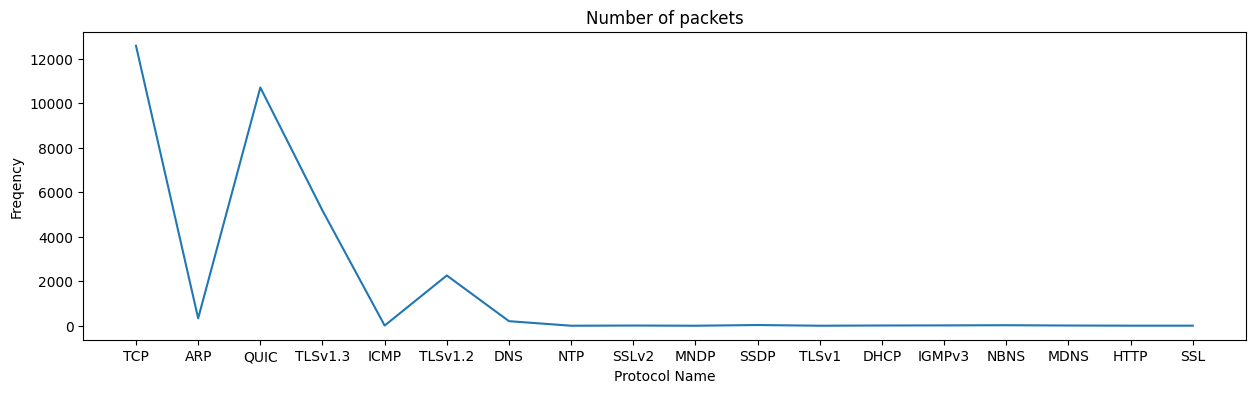

In [7]:
protocol_number = {}
for i in df['Protocol']:
    if i not in protocol_number:
        protocol_number[i]=1
    else:
        protocol_number[i]+=1
plt.figure(figsize=(15,4))
plt.plot(protocol_number.keys(),protocol_number.values())
plt.xlabel("Protocol Name")
plt.ylabel("Freqency")
plt.title("Number of packets")
plt.show()

Average length of protocols

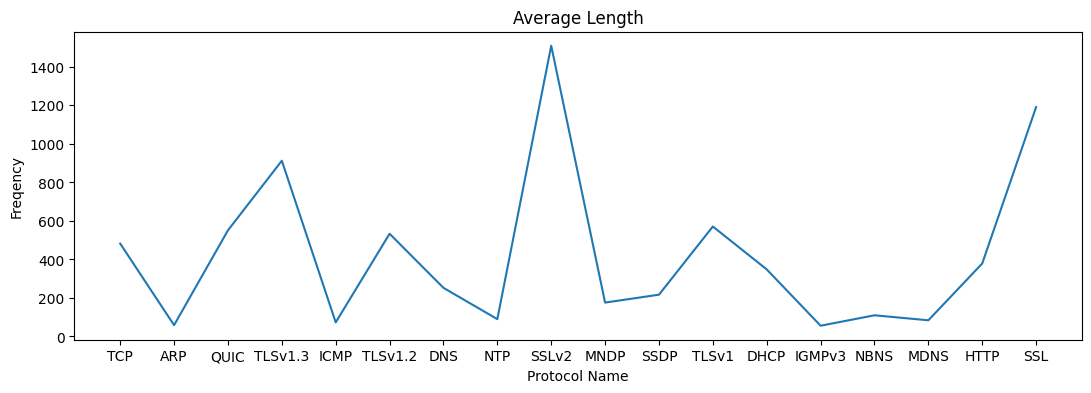

In [8]:
protocol_number = {}
protocol_length = {}
j=0
for i in df['Protocol']:
    if i not in protocol_number:
        protocol_number[i]=1
    else:
        protocol_number[i]+=1
    if i not in protocol_length:
        protocol_length[i]=df.iat[j,4]
    else:
        protocol_length[i]+=df.iat[j,4]
    j+=1
protocol_avg = {}
for i in protocol_number:
    protocol_avg[i]=(protocol_length[i]/protocol_number[i])
plt.figure(figsize=(13,4))
plt.plot(protocol_number.keys(),protocol_avg.values())
plt.xlabel("Protocol Name")
plt.ylabel("Freqency")
plt.title("Average Length")
plt.show()  

Heatmap for packet clustering duration

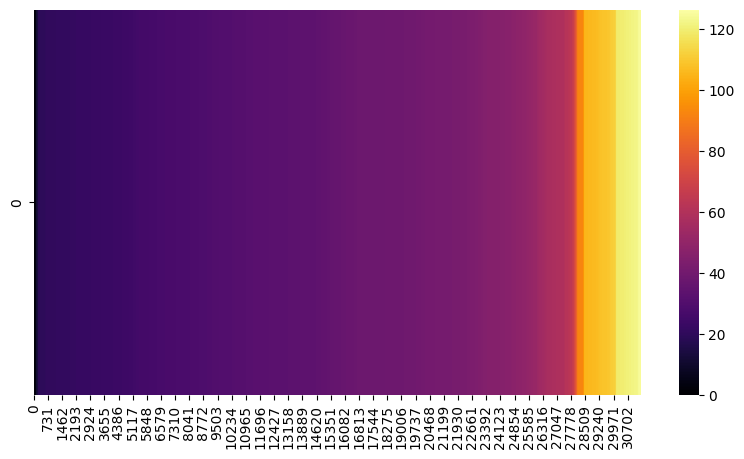

In [9]:
l1 = []
for i in df['Time']:
    l1.append(i)
hm = np.asarray(l1)
plt.figure(figsize=(9.8,5))
sb.heatmap([hm],cmap='inferno')
plt.show()

Histogram for packet clustering duration

Maximum traffic:  38s
Idle times: 

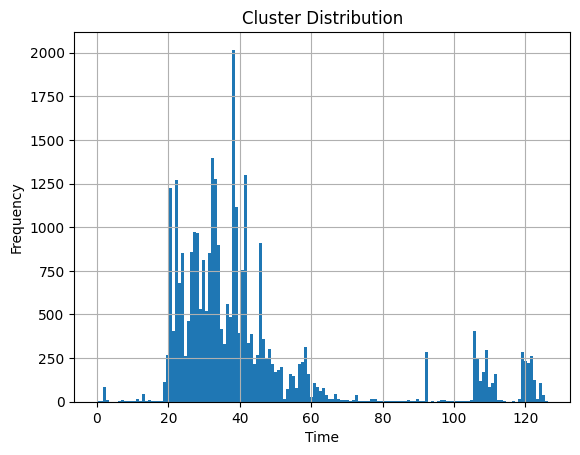

In [10]:
second_wise = {}
for i in df['Time']:
    j=i//1
    if j not in second_wise:
        second_wise[int(j)]=1
    else:
        second_wise[int(j)]+=1
max = 0
pos = ''
for i in second_wise:
    if second_wise[i]>max:
        max = second_wise[i]
        pos=i
print("Maximum traffic: ",str(pos)+"s")
print("Idle times: ",end="")
for i in range(1,len(second_wise)):
    if i not in second_wise.keys():
        print(str(i)+"s",end=" ")
plt.hist(df.Time,bins=150)
plt.grid()
plt.title("Cluster Distribution")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

#### TCP Analysis

In [11]:
tcp = df[df['Protocol']=='TCP']
tcp.tail(6)

,Time,Source,Destination,Protocol,Length,Info
No.,,,,,,
31391,124.741076,10.87.1.105,13.67.74.235,TCP,54,62552 > 443 [ACK] Seq=676 Ack=6099 Win=66048...
31392,124.782018,13.67.74.235,10.87.1.105,TCP,92,"[TCP Retransmission] 443 > 62551 [PSH, ACK] ..."
31393,124.782059,10.87.1.105,13.67.74.235,TCP,66,62551 > 443 [ACK] Seq=1983 Ack=6137 Win=6604...
31396,124.875606,20.198.118.190,10.87.1.105,TCP,205,"[TCP Retransmission] 443 > 61035 [PSH, ACK] ..."
31398,125.558630,157.240.16.53,10.87.1.105,TCP,109,"[TCP Retransmission] 80 > 62494 [FIN, PSH, A..."
31402,126.276287,54.201.236.40,10.87.1.105,TCP,244,"[TCP Retransmission] 443 > 62100 [PSH, ACK] ..."


Error Percentage

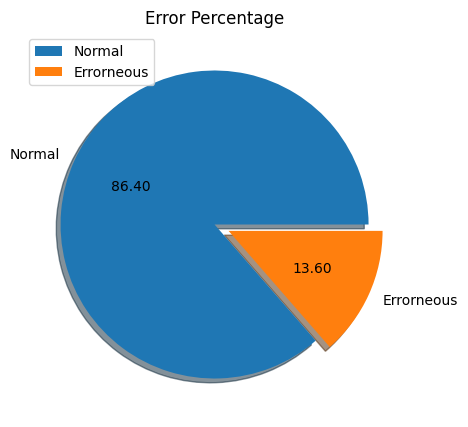

In [12]:
error = {'Retransmission':0,'Keep-Alive':0,'Dup ACK':0,'Previous':0,'Unseen':0,'Unordered':0,'Fast':0,'Spurious':0,'Window Update':0}
comp={'Normal':0,'Errorneous':0}
for i in tcp['Info']:
    if i.__contains__('Fast Retransmission'):
        error['Fast']+=1
    elif i.__contains__('Spurious'):
        error['Spurious']+=1
    elif i.__contains__('Retransmission'):
        error['Retransmission']+=1
    elif i.__contains__('Dup ACK'):
        error['Dup ACK']+=1
    elif i.__contains__('Previous segment'):
        error['Previous']+=1
    elif i.__contains__('Out-Of-Order'):
        error['Unordered']+=1
    elif i.__contains__('ACKed'):
        error['Unseen']+=1
    elif i.__contains__('Window Update'):
        error['Window Update']+=1
    elif i.__contains__('Keep-Alive'):
        error['Keep-Alive']+=1
    else:
        comp['Normal']+=1
comp['Errorneous']=len(tcp)-comp['Normal']
plt.figure(figsize=(5,5))
plt.pie(comp.values(),labels=comp.keys(),autopct='%.2f',shadow=True,explode=[0,0.1])
plt.legend(loc='best')
plt.title('Error Percentage')
plt.show()

Error Packets Composition

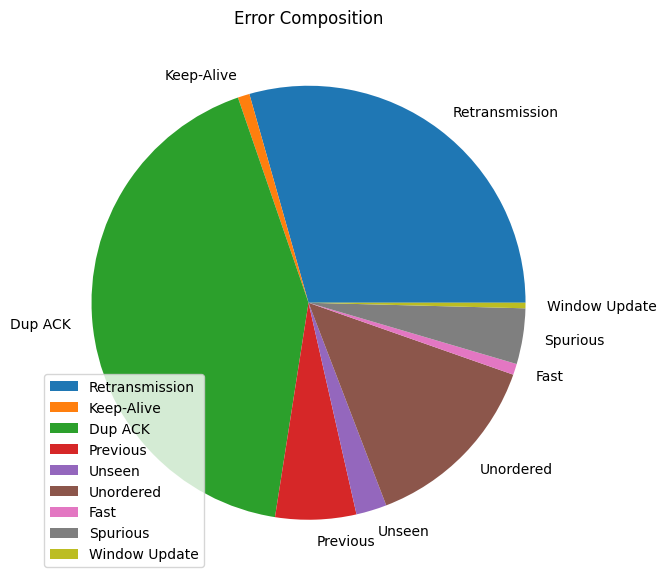

In [13]:
plt.figure(figsize=(7,10))
plt.pie(error.values(),labels=error.keys())
plt.legend(loc='best')
plt.title('Error Composition')
plt.show()

Bad TCP Duration

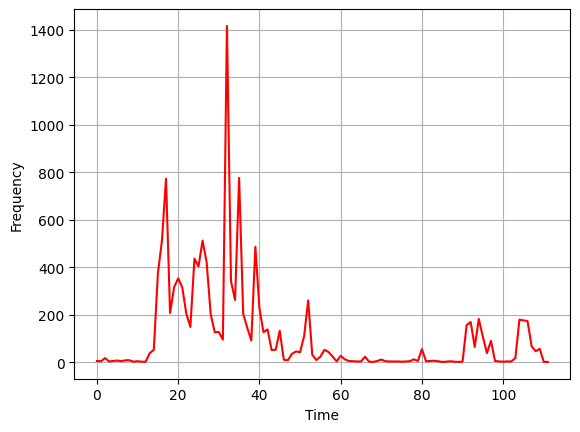

In [14]:
second_wise = {}
for i in tcp['Time']:
    j=i//1
    if j not in second_wise:
        second_wise[int(j)]=1
    else:
        second_wise[int(j)]+=1
maxn = 0
pos = ''
for i in second_wise:
    if second_wise[i]>max:
        maxn = second_wise[i]
        pos=i
plt.plot(second_wise.values(),color='red')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.grid()
plt.show()
# print(pd.DataFrame(second_wise.values(),index=second_wise.keys()).idxmax())

#### Application Layer Analysis

In [15]:
URL = "https://en.wikipedia.org/wiki/Application_layer"
r = requests.get(URL)
l1 = {}  
soup = BeautifulSoup(r.content, 'html5lib')
table = soup.find('td',attrs={'class':'sidebar-content'})
for k in table.findAll('ul'):
    for i in k.findAll('li'):
        for j in i.findAll('a'):
            l1[j.text]=0
for i in df['Protocol']:
    if i in l1.keys():
        l1[i]+=1
temp = l1.items()
l1 = {}
for i,j in temp:
    if j!=0:
        l1[i]=j
l2={}
temp = l1.items()
for i,j in temp:
    if j!=0:
        l2[i]=j
pd.DataFrame(l1,index=['Frequency'])

,DHCP,DNS,HTTP,NTP
Frequency,12,206,4,2


Average length and frequencies comparisions

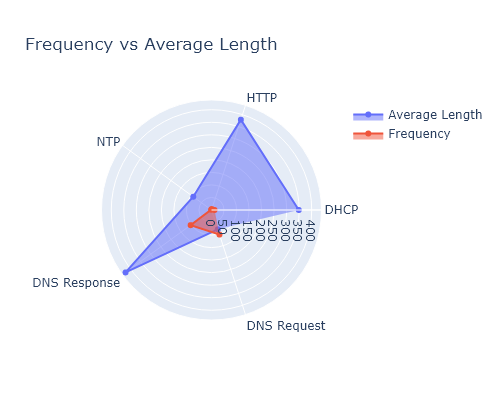

In [19]:
dns = df[df['Protocol']=='DNS']
l1['DNS Response'],l1['DNS Request'],l2['DNS Response'],l2['DNS Request'],j=0,0,0,0,0
temp = protocol_avg.items()
for i in dns['Info']:
    if i.__contains__('response'):
        l1['DNS Response']+=1
        l2['DNS Response']+=dns.iat[j,4]
    else:
        l1['DNS Request']+=1
        l2['DNS Request']+=dns.iat[j,4]
    j+=1
l1.pop('DNS')
l2.pop('DNS')
l2['DNS Request'] = l2['DNS Request'] / l1['DNS Request']
l2['DNS Response'] = l2['DNS Response'] / l1['DNS Response']
for i in l2.keys():
    for a,b in temp:
        if i==a:
            l2[i]=b
fig = go.Figure()
fig.add_trace(go.Scatterpolar(r=list(l2.values()),theta=list(l1.keys()),fill='toself',name='Average Length'))
fig.add_trace(go.Scatterpolar(r=list(l1.values()),theta=list(l1.keys()),fill='toself',name='Frequency'))
fig.update_layout(autosize=False,height=400,width=500,title={'text':'Frequency vs Average Length'})
fig.show('png')

In [17]:
max_protocol = pd.DataFrame(protocol_number,index=[0]).T.idxmax()
max_number = pd.DataFrame(protocol_number,index=[0]).T.max()
max_avglength = pd.DataFrame(protocol_avg,index=[0]).T.max()

#### Conclusion